
# **Módulo 5 Tarefa 1**
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.).

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
`
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']
`
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'.
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'.
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.



** 1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. Há linhas duplicadas?**

In [1]:
import pandas as pd

In [19]:
# Caminho do arquivo (ajuste conforme necessário)
arquivo = "/content/SINASC_RO_2019.csv"

# Leitura do arquivo
df = pd.read_csv(arquivo, sep=';', encoding='latin1')

# Visualizar as primeiras linhas
df.head()

,"ORIGEM,""CODESTAB"",""CODMUNNASC"",""LOCNASC"",""IDADEMAE"",""ESTCIVMAE"",""ESCMAE"",""CODOCUPMAE"",""QTDFILVIVO"",""QTDFILMORT"",""CODMUNRES"",""GESTACAO"",""GRAVIDEZ"",""PARTO"",""CONSULTAS"",""DTNASC"",""HORANASC"",""SEXO"",""APGAR1"",""APGAR5"",""RACACOR"",""PESO"",""IDANOMAL"",""DTCADASTRO"",""CODANOMAL"",""NUMEROLOTE"",""VERSAOSIST"",""DTRECEBIM"",""DIFDATA"",""DTRECORIGA"",""NATURALMAE"",""CODMUNNATU"",""CODUFNATU"",""ESCMAE2010"",""SERIESCMAE"",""DTNASCMAE"",""RACACORMAE"",""QTDGESTANT"",""QTDPARTNOR"",""QTDPARTCES"",""IDADEPAI"",""DTULTMENST"",""SEMAGESTAC"",""TPMETESTIM"",""CONSPRENAT"",""MESPRENAT"",""TPAPRESENT"",""STTRABPART"",""STCESPARTO"",""TPNASCASSI"",""TPFUNCRESP"",""TPDOCRESP"",""DTDECLARAC"",""ESCMAEAGR1"",""STDNEPIDEM"",""STDNNOVA"",""CODPAISRES"",""TPROBSON"",""PARIDADE"",""KOTELCHUCK"",""CONTADOR"",""munResStatus"",""munResTipo"",""munResNome"",""munResUf"",""munResLat"",""munResLon"",""munResAlt"",""munResArea"""
0,"1,""2679477"",""110001"",""1"",19,""5"",""8 a 11 anos"",..."
1,"1,""2679477"",""110001"",""1"",29,""2"",""8 a 11 anos"",..."
2,"1,""2679477"",""110001"",""1"",37,""9"",""8 a 11 anos"",..."
3,"1,""2516500"",""110001"",""1"",30,""5"",""12 anos ou ma..."
4,"1,""2516500"",""110001"",""1"",30,""2"",""8 a 11 anos"",..."


In [15]:
import pandas as pd

# Carregar a base de dados
df = pd.read_csv('SINASC_RO_2019.csv', sep=';', encoding='latin1') # Ajuste o separador e o encoding conforme necessário

# Contar o número total de registros
total_registros = len(df)

 **Contar registros totais e únicos**

In [21]:
# Contar registros totais e únicos
total_registros = len(df)
registros_unicos = len(df.drop_duplicates())

print(f"Total de registros: {total_registros}")
print(f"Registros únicos (sem duplicados): {registros_unicos}")

if total_registros == registros_unicos:
    print("Não há registros duplicados")
else:
    print("Existem registros duplicados na base")

Total de registros: 27028
Registros únicos (sem duplicados): 27028
Não há registros duplicados


**2 – Contar valores ausentes (missing)**

In [22]:
valores_faltantes = df.isnull().sum()
print("Valores ausentes por coluna:\n")
print(valores_faltantes)

Valores ausentes por coluna:

ORIGEM,"CODESTAB","CODMUNNASC","LOCNASC","IDADEMAE","ESTCIVMAE","ESCMAE","CODOCUPMAE","QTDFILVIVO","QTDFILMORT","CODMUNRES","GESTACAO","GRAVIDEZ","PARTO","CONSULTAS","DTNASC","HORANASC","SEXO","APGAR1","APGAR5","RACACOR","PESO","IDANOMAL","DTCADASTRO","CODANOMAL","NUMEROLOTE","VERSAOSIST","DTRECEBIM","DIFDATA","DTRECORIGA","NATURALMAE","CODMUNNATU","CODUFNATU","ESCMAE2010","SERIESCMAE","DTNASCMAE","RACACORMAE","QTDGESTANT","QTDPARTNOR","QTDPARTCES","IDADEPAI","DTULTMENST","SEMAGESTAC","TPMETESTIM","CONSPRENAT","MESPRENAT","TPAPRESENT","STTRABPART","STCESPARTO","TPNASCASSI","TPFUNCRESP","TPDOCRESP","DTDECLARAC","ESCMAEAGR1","STDNEPIDEM","STDNNOVA","CODPAISRES","TPROBSON","PARIDADE","KOTELCHUCK","CONTADOR","munResStatus","munResTipo","munResNome","munResUf","munResLat","munResLon","munResAlt","munResArea"    0
dtype: int64


**3 – Selecionar colunas de interesse**

In [24]:
colunas_interesse = [
    'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'
]

# Usar o DataFrame 'sinasc' que foi carregado corretamente
df_sel = sinasc[colunas_interesse].copy()

# Contagem de valores ausentes novamente
print("Valores ausentes após seleção de colunas:\n")
print(df_sel.isnull().sum())

Valores ausentes após seleção de colunas:

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
dtype: int64


**Etapa 4 – Remover registros com Apgar5 ausente**

In [26]:
df_sel = df_sel.dropna(subset=['APGAR5'])

print(f"Número de registros após remoção: {len(df_sel)}")
print("Valores ausentes após a remoção:\n")
print(df_sel.isnull().sum())

Número de registros após remoção: 26925
Valores ausentes após a remoção:

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      315
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64


**5 – Substituir códigos ignorados**

In [27]:
# '9' representa "ignorado" nas variáveis ESTCIVMAE e CONSULTAS
df_sel['ESTCIVMAE'] = df_sel['ESTCIVMAE'].fillna(9)
df_sel['CONSULTAS'] = df_sel['CONSULTAS'].fillna(9)

/tmp/ipython-input-3441393512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['ESTCIVMAE'] = df_sel['ESTCIVMAE'].fillna(9)
/tmp/ipython-input-3441393512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['CONSULTAS'] = df_sel['CONSULTAS'].fillna(9)


**6 – Substituir valores faltantes em Quantidade de Filho VIVO por zero**

In [34]:
df_sel['QTDFILVIVO'] = df_sel['QTDFILVIVO'].fillna(0)

**Etapa 7 – Tratar demais variáveis faltantes**

In [35]:
# Aqui, podemos assumir que valores faltantes em ESCMAE, GESTACAO e GRAVIDEZ
# significam "não informado" e preenchê-los com um código neutro, como 9.

df_sel[['ESCMAE', 'GESTACAO', 'GRAVIDEZ']] = df_sel[['ESCMAE', 'GESTACAO', 'GRAVIDEZ']].fillna(9)

print("Valores faltantes após tratamento:\n")
print(df_sel.isnull().sum())

Valores faltantes após tratamento:

LOCNASC       0
IDADEMAE      0
ESTCIVMAE     0
ESCMAE        0
QTDFILVIVO    0
GESTACAO      0
GRAVIDEZ      0
CONSULTAS     0
APGAR5        0
dtype: int64


**8 – Criar categorização do Apgar5**

In [36]:
def classificar_apgar(valor):
    if 8 <= valor <= 10:
        return 'Normal'
    elif 6 <= valor <= 7:
        return 'Asfixia leve'
    elif 4 <= valor <= 5:
        return 'Asfixia moderada'
    else:
        return 'Asfixia severa'

df_sel['CATEGORIA_APGAR'] = df_sel['APGAR5'].apply(classificar_apgar)

# Frequências por categoria
print("Frequência de categorias do Apgar5:\n")
print(df_sel['CATEGORIA_APGAR'].value_counts())

Frequência de categorias do Apgar5:

CATEGORIA_APGAR
Normal              26463
Asfixia leve          320
Asfixia severa         74
Asfixia moderada       68
Name: count, dtype: int64


**9 – Renomear variáveis para snake_case**

In [37]:
df_sel.rename(columns={
    'LOCNASC': 'local_nascimento',
    'IDADEMAE': 'idade_mae',
    'ESTCIVMAE': 'estado_civil_mae',
    'ESCMAE': 'escolaridade_mae',
    'QTDFILVIVO': 'qtd_filhos_vivos',
    'GESTACAO': 'gestacao',
    'GRAVIDEZ': 'gravidez',
    'CONSULTAS': 'consultas_prenatal',
    'APGAR5': 'apgar5'
}, inplace=True)

df_sel.head()

,local_nascimento,idade_mae,estado_civil_mae,escolaridade_mae,qtd_filhos_vivos,gestacao,gravidez,consultas_prenatal,apgar5,CATEGORIA_APGAR
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Normal
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Normal


In [33]:
# Analisar a relação entre apgar5_categoria e idademae

# Calcular estatísticas descritivas de idade mae por apgar5_categoria
print("Estatísticas descritivas de idade mae por apgar5_categoria:")
display(df_final.groupby('apgar5_categoria')['idademae'].describe())

Estatísticas descritivas de idade mae por apgar5_categoria:


/tmp/ipython-input-3739889425.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_final.groupby('apgar5_categoria')['idademae'].describe())


,count,mean,std,min,25%,50%,75%,max
apgar5_categoria,,,,,,,,
asfixia severa,74.0,24.878378,6.419048,13.0,20.0,24.0,28.75,42.0
asfixia moderada,68.0,27.500000,7.817890,14.0,21.0,27.0,35.00,44.0
asfixia leve,320.0,25.934375,6.975915,12.0,20.0,25.0,32.00,42.0
normal,26463.0,26.097079,6.374459,11.0,21.0,26.0,31.00,53.0


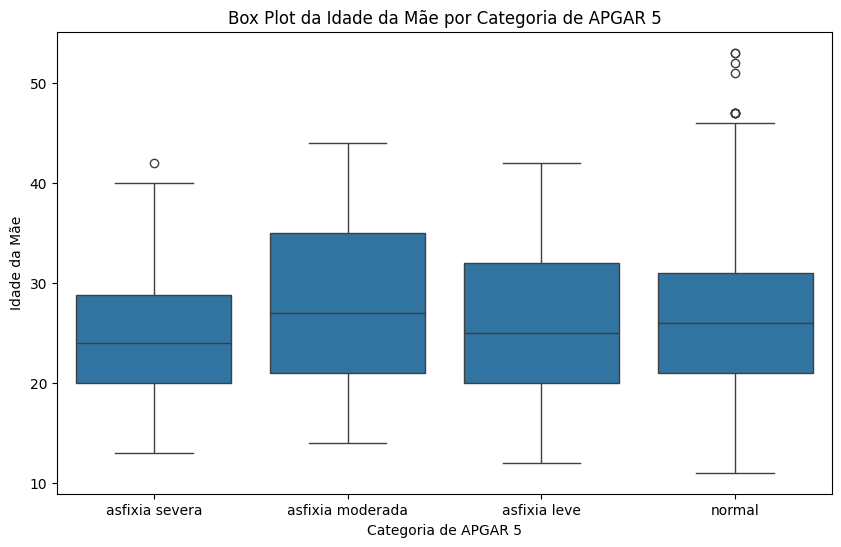

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um box plot da idade da mãe por categoria de Apgar 5
plt.figure(figsize=(10, 6))
sns.boxplot(x='apgar5_categoria', y='idademae', data=df_final)
plt.title('Box Plot da Idade da Mãe por Categoria de APGAR 5')
plt.xlabel('Categoria de APGAR 5')
plt.ylabel('Idade da Mãe')
plt.show()

In [28]:
# Explorar as informações descritivas do DataFrame final
print("Informações descritivas do DataFrame final:")
display(df_final.describe(include='all'))

Informações descritivas do DataFrame final:


,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,apgar5_categoria
count,26925.000000,26925.000000,26925.000000,26925,26925.000000,26925,26925,26925.000000,26925.000000,26925
unique,NaN,NaN,NaN,5,NaN,6,3,NaN,NaN,4
top,NaN,NaN,NaN,8 a 11 anos,NaN,37 a 41 semanas,Única,NaN,NaN,normal
freq,NaN,NaN,NaN,15891,NaN,23739,26432,NaN,NaN,26463
mean,1.007168,26.095339,2.500910,NaN,0.989601,NaN,NaN,3.578793,9.179164,NaN
std,0.126025,6.386409,1.592925,NaN,1.158913,NaN,NaN,0.785540,0.790574,NaN
min,1.000000,11.000000,1.000000,NaN,0.000000,NaN,NaN,1.000000,0.000000,NaN
25%,1.000000,21.000000,1.000000,NaN,0.000000,NaN,NaN,3.000000,9.000000,NaN
50%,1.000000,26.000000,2.000000,NaN,1.000000,NaN,NaN,4.000000,9.000000,NaN
75%,1.000000,31.000000,5.000000,NaN,1.000000,NaN,NaN,4.000000,10.000000,NaN


In [17]:
# Item 9: Renomear as variáveis para snake case

# Criar uma cópia explícita do DataFrame para evitar SettingWithCopyWarning
df_final = df_apgar5_preenchido.copy()

# Mapeamento para renomear as colunas para snake case
colunas_snake_case = {
    'LOCNASC': 'locnasc',
    'IDADEMAE': 'idademae',
    'ESTCIVMAE': 'estcivmae',
    'ESCMAE': 'escmae',
    'QTDFILVIVO': 'qtdfilvivo',
    'GESTACAO': 'gestacao',
    'GRAVIDEZ': 'gravidez',
    'CONSULTAS': 'consultas',
    'APGAR5': 'apgar5',
    'APGAR5_CATEGORIA': 'apgar5_categoria' # Incluindo a coluna criada no item 8
}

# Renomear as colunas
df_final.rename(columns=colunas_snake_case, inplace=True)

# Exibir os nomes das colunas para verificar
print("Nomes das colunas após renomear para snake case:")
print(df_final.columns)

# Exibir as primeiras linhas do DataFrame final
print("\nPrimeiras linhas do DataFrame final:")
display(df_final.head())

Nomes das colunas após renomear para snake case:
Index(['locnasc', 'idademae', 'estcivmae', 'escmae', 'qtdfilvivo', 'gestacao',
       'gravidez', 'consultas', 'apgar5', 'apgar5_categoria'],
      dtype='object')

Primeiras linhas do DataFrame final:


,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,apgar5_categoria
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,normal
2,1,37,2.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,normal


In [25]:
# Item 4: Remover registros com Apgar5 não preenchido
df_apgar5_preenchido = df_sel.dropna(subset=['APGAR5']).copy()

# Contar o número de linhas após a remoção
num_linhas_apos_remocao_apgar5 = len(df_apgar5_preenchido)
print(f"Número de linhas após remover registros com Apgar5 não preenchido: {num_linhas_apos_remocao_apgar5}")

# Contar o número de valores missing novamente após a remoção
missing_values_apos_remocao_apgar5 = df_apgar5_preenchido.isnull().sum()
print("\nNúmero de valores missing após remover registros com Apgar5 não preenchido:")
display(missing_values_apos_remocao_apgar5)

Número de linhas após remover registros com Apgar5 não preenchido: 26925

Número de valores missing após remover registros com Apgar5 não preenchido:


,0
LOCNASC,0
IDADEMAE,0
ESTCIVMAE,315
ESCMAE,310
QTDFILVIVO,1566
GESTACAO,1216
GRAVIDEZ,76
CONSULTAS,0
APGAR5,0


In [16]:
# Item 8: Categorizar a variável APGAR5 e calcular frequências

# Definir as faixas de asfixia
bins = [-0.1, 3, 5, 7, 10] # Adicionado -0.1 para incluir o 0
labels = ['asfixia severa', 'asfixia moderada', 'asfixia leve', 'normal']

# Criar a nova coluna categorizada
df_apgar5_preenchido['APGAR5_CATEGORIA'] = pd.cut(df_apgar5_preenchido['APGAR5'], bins=bins, labels=labels, right=True)

# Calcular as frequências da nova coluna categorizada
frequencia_apgar5_categoria = df_apgar5_preenchido['APGAR5_CATEGORIA'].value_counts().sort_index()

print("Frequência da categorização de APGAR5:")
display(frequencia_apgar5_categoria)

Frequência da categorização de APGAR5:


/tmp/ipython-input-3589696246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apgar5_preenchido['APGAR5_CATEGORIA'] = pd.cut(df_apgar5_preenchido['APGAR5'], bins=bins, labels=labels, right=True)


,count
APGAR5_CATEGORIA,
asfixia severa,74
asfixia moderada,68
asfixia leve,320
normal,26463


In [14]:
# Item 7: Tratar os valores ausentes restantes

# Tratar código 9 em ESTCIVMAE como missing (NaN) - Conforme item 5
df_apgar5_preenchido.loc[df_apgar5_preenchido['ESTCIVMAE'] == 9, 'ESTCIVMAE'] = None

# Preencher valores ausentes nas colunas restantes com a moda
# Justificativa: A moda é uma escolha razoável para variáveis categóricas ou ordinais
# pois representa o valor mais frequente na distribuição.

colunas_para_preencher_moda = ['ESTCIVMAE', 'ESCMAE', 'GESTACAO', 'GRAVIDEZ']

for coluna in colunas_para_preencher_moda:
    if df_apgar5_preenchido[coluna].isnull().any():
        moda = df_apgar5_preenchido[coluna].mode()[0]
        df_apgar5_preenchido.loc[:, coluna] = df_apgar5_preenchido[coluna].fillna(moda)

# Verificar se ainda há valores missing
print("Número de valores missing após preencher os restantes:")
display(df_apgar5_preenchido.isnull().sum())

Número de valores missing após preencher os restantes:


,0
LOCNASC,0
IDADEMAE,0
ESTCIVMAE,0
ESCMAE,0
QTDFILVIVO,0
GESTACAO,0
GRAVIDEZ,0
CONSULTAS,0
APGAR5,0


In [13]:
# Substituir os valores faltantes de QTDFILVIVO por zero
df_apgar5_preenchido['QTDFILVIVO'] = df_apgar5_preenchido['QTDFILVIVO'].fillna(0)

# Verificar se os valores missing em QTDFILVIVO foram preenchidos
print("Número de valores missing após preencher QTDFILVIVO com zero:")
display(df_apgar5_preenchido.isnull().sum())

Número de valores missing após preencher QTDFILVIVO com zero:


/tmp/ipython-input-2087284372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apgar5_preenchido['QTDFILVIVO'] = df_apgar5_preenchido['QTDFILVIVO'].fillna(0)


,0
LOCNASC,0
IDADEMAE,0
ESTCIVMAE,315
ESCMAE,310
QTDFILVIVO,0
GESTACAO,1216
GRAVIDEZ,76
CONSULTAS,0
APGAR5,0


In [12]:
# Remover registros com Apgar5 não preenchido
df_apgar5_preenchido = df_selecionado.dropna(subset=['APGAR5'])

# Contar o número de linhas após a remoção
num_linhas_apos_remocao_apgar5 = len(df_apgar5_preenchido)
print(f"Número de linhas após remover registros com Apgar5 não preenchido: {num_linhas_apos_remocao_apgar5}")

# Contar o número de valores missing novamente após a remoção
missing_values_apos_remocao_apgar5 = df_apgar5_preenchido.isnull().sum()
print("\nNúmero de valores missing após remover registros com Apgar5 não preenchido:")
display(missing_values_apos_remocao_apgar5)

Número de linhas após remover registros com Apgar5 não preenchido: 26925

Número de valores missing após remover registros com Apgar5 não preenchido:


,0
LOCNASC,0
IDADEMAE,0
ESTCIVMAE,315
ESCMAE,310
QTDFILVIVO,1566
GESTACAO,1216
GRAVIDEZ,76
CONSULTAS,0
APGAR5,0


In [11]:
# Selecionar as colunas de interesse
colunas_interesse = ['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']
df_selecionado = df[colunas_interesse]

# Refazer a contagem de valores missing para as colunas selecionadas
missing_values_selecionado = df_selecionado.isnull().sum()
print("Número de valores missing para as colunas selecionadas:")
display(missing_values_selecionado)

Número de valores missing para as colunas selecionadas:


,0
LOCNASC,0
IDADEMAE,0
ESTCIVMAE,317
ESCMAE,312
QTDFILVIVO,1573
GESTACAO,1232
GRAVIDEZ,79
CONSULTAS,0
APGAR5,103


In [9]:
import pandas as pd

# Caminho para o arquivo CSV no Colab após o upload
file_path = '/content/SINASC_RO_2019.csv'

try:
    # Carregar a base de dados do arquivo local
    # Tentando com separador ',' e encoding 'utf-8'
    df = pd.read_csv(file_path, sep=',', encoding='utf-8')

    # Contar o número total de registros
    total_registros = len(df)
    print(f"Número total de registros: {total_registros}")

    # Contar o número de registros não duplicados
    registros_nao_duplicados = len(df.drop_duplicates())
    print(f"Número de registros não duplicados: {registros_nao_duplicados}")

    # Verificar se há linhas duplicadas
    if total_registros > registros_nao_duplicados:
        print("Há linhas duplicadas na base.")
    else:
        print("Não há linhas duplicadas na base.")

except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado. Certifique-se de que o arquivo foi carregado corretamente.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

Número total de registros: 27028
Número de registros não duplicados: 27028
Não há linhas duplicadas na base.


In [10]:
# Contar o número de valores missing por variável
missing_values = df.isnull().sum()
print("Número de valores missing por variável:")
display(missing_values)

Número de valores missing por variável:


,0
ORIGEM,0
CODESTAB,115
CODMUNNASC,0
LOCNASC,0
IDADEMAE,0
...,...
munResUf,0
munResLat,1
munResLon,1
munResAlt,1


In [18]:
import pandas as pd
import requests

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)